In [3]:
import pandas as pd
import json

In [36]:
from numpy import nan
import math

## Function which is calculating H-index

In [32]:
def h_index(citations):
    """
    https://github.com/kamyu104/LeetCode/blob/master/Python/h-index.py
    :type citations: List[int]
    :rtype: int
    
    # Given an array of citations (each citation is a non-negative integer)
    # of a researcher, write a function to compute the researcher's h-index.
    #
    # According to the definition of h-index on Wikipedia: 
    # "A scientist has index h if h of his/her N papers have
    # at least h citations each, and the other N − h papers have
    # no more than h citations each."
    #
    # For example, given citations = [3, 0, 6, 1, 5], 
    # which means the researcher has 5 papers in total
    # and each of them had received 3, 0, 6, 1, 5 citations respectively. 
    # Since the researcher has 3 papers with at least 3 citations each and 
    # the remaining two with no more than 3 citations each, his h-index is 3.
    #
    # Note: If there are several possible values for h, the maximum one is taken as the h-index.
    """
    return sum(x >= i + 1 for i, x in enumerate(sorted(  list(citations), reverse=True)))

In [ ]:
# Propose (Den4S): for h-index calculation
# papers_citatios = ListField(IntegerField)  # list of paper citations (order doesn't matter!)

In [19]:
author_id_name = {}  # author's name by id
author_articles = {}  # authors articles by id (key: author_id, value: list of articles id)

author_n_citations = {}  # key: author_id, value: list of int(n_citations) of all his articles!
article_citations = {}  # article's citations by article's id (key: article_id, value: list of articles id)

articles_no_author = []  # articles with NaN author 

In [40]:
with open('author_id_name.json') as json_file:  # load file
    # key: author_id, value: list of int(n_citations) of all his articles!
    author_id_name = json.load(json_file)

In [41]:
with open('author_n_citations.json') as json_file:  # load file
    # key: author_id, value: list of int(n_citations) of all his articles!
    author_n_citations = json.load(json_file)

In [18]:
authors_id = list(author_n_citations.keys())
len(authors_id)

4362827

In [43]:
author_h_index = {}  # dict: {'author_id': {'name': 'Username', 'h-index': int(H-index)}}
all_h_indeces = []

In [44]:
for author_id in author_n_citations.keys():
    value = {'name': author_id_name[author_id], 'h-index': 0}
    author_citations = author_n_citations[author_id]  # list of articles citations
    author_citations = [0 if math.isnan(x) else int(x) for x in author_citations]
    value['h-index'] = h_index(author_citations)
    all_h_indeces.append(value['h-index'])
    author_h_index[author_id] = value

In [46]:
with open('author_id_hindex.json', 'w') as fp:
    json.dump(author_h_index, fp)

In [45]:
all_h_indeces[1:20]

[0, 4, 0, 0, 6, 36, 1, 12, 1, 0, 0, 16, 2, 1, 1, 1, 1, 1, 0]

## H-idexes distribution in DB

In [48]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [64]:
from matplotlib import colors
plt.rcParams.update({'font.size': 16})

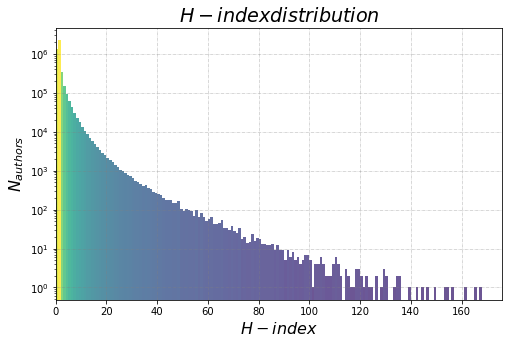

In [79]:
data = all_h_indeces

# fixed bin size
BIN_SZ = 1
bins = np.arange(0, max(data), BIN_SZ) # fixed bin size

fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
DLT = 0  # slightli shift axis limit
plt.xlim([min(data) - DLT, max(data) + DLT])

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

N, bins, patches = plt.hist(data, bins=bins, alpha=0.8)

# Setting color
fracs = ((N**(1 / 7)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
plt.title("$H-index distribution$")
plt.xlabel(f"$H-index$")
plt.ylabel("$N_{authors}$")
plt.yscale('log')
ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()

In [83]:
sorted(all_h_indeces)[-10:]

[144, 146, 149, 153, 154, 156, 161, 165, 167, 176]

## Connections

Study a connection between average _**h-index**_ of the paper and _**n_citations**_

In [103]:
# plt.style.use('https://raw.githubusercontent.com/toftul/plt-styles-phys/main/phys-plots-cm.mplstyle')
plt.style.use('https://raw.githubusercontent.com/toftul/plt-styles-phys/main/phys-plots-sans.mplstyle')

In [85]:
with open('av_hindex_n_citations.txt') as f:
    lines = [line.rstrip() for line in f]

In [93]:
citations_lst = []
average_hindex_lst = []
for line in lines:
    av_h_ind, n_cit = map(float, line.split('\t'))
    citations_lst.append(n_cit)
    average_hindex_lst.append(av_h_ind)

In [94]:
min(average_hindex_lst), max(average_hindex_lst)

(0.0, 176.0)

### Plot

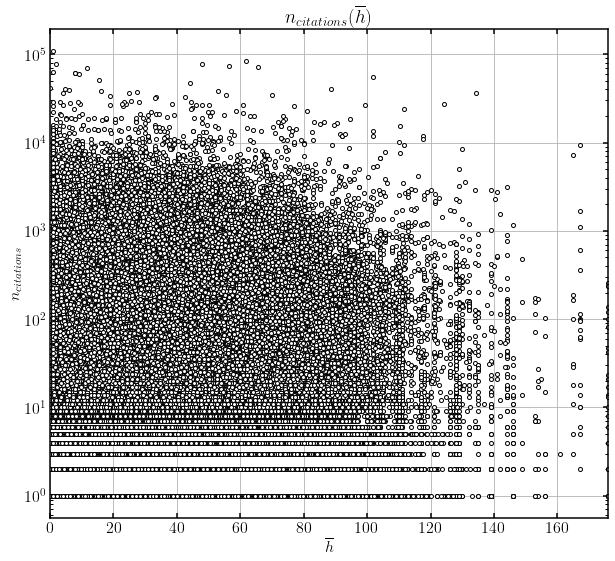

In [137]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 9)

plt.plot(average_hindex_lst, citations_lst, 'o', 
         markersize=4, markerfacecolor='w', markeredgewidth=1, markeredgecolor='k')
plt.title("$n_{citations}(\overline{h})$")
# ax.legend()
# ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel("$n_{citations}$")
plt.xlabel("$\overline{h}$")
# plt.xlim([min(average_hindex_lst), max(average_hindex_lst)])
# plt.ylim([0, 1])
plt.grid()
plt.show()

### There is no connection!